In [1]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [13]:
weight = 0.7
bias = 0.3

X = torch.arange(0 , 1 , 0.02).unsqueeze(1)
y = X*weight + bias

train_split = int(len(X)*0.8)
X_train ,y_train= X[:train_split] , y[:train_split]
X_test ,y_test= X[train_split:] , y[train_split:]

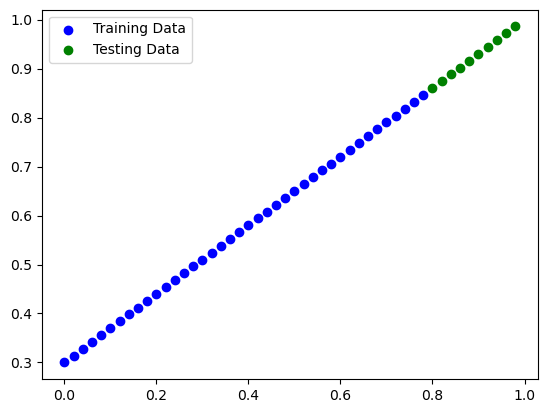

In [14]:
def plot_predictions(train_data , train_labels , test_data , test_labels , predictions = None):
    plt.scatter(train_data , train_labels , c = "b" , label = "Training Data")

    plt.scatter(test_data , test_labels , c = "g" , label = "Testing Data")


    if predictions is not None:
        plt.scatter(test_data , predictions , c = "r" , label = "Predictions")
    
    plt.legend()

plot_predictions(X_train , y_train , X_test , y_test)

In [15]:
class LinearRegressionGPU(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating model parameters

        self.linear_layer = nn.Linear(in_features = X.shape[1], out_features = y.shape[1])

    def forward(self , x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)

model = LinearRegressionGPU()


# PUTTING MODEL AND DATA ON GPU
model.to(device)
X_train , y_train ,X_test , y_test= X_train.to(device) , y_train.to(device) , X_test.to(device) , y_test.to(device)

# LOSS FUNCTION , OPTIMIZER , TRAINING LOOP , TESTING LOOP

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(lr = 0.01, params=model.parameters())

epochs = 200

for epoch in range(epochs):
    # TRAINING LOOP 
    model.train()

    y_preds = model(X_train)

    loss = loss_fn(y_preds , y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step() 

    # TESTING LOOP
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred , y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} , Loss: {loss} , Training Loss: {test_loss}")

Epoch: 0 , Loss: 0.5551779866218567 , Training Loss: 0.5739762187004089
Epoch: 10 , Loss: 0.439968079328537 , Training Loss: 0.4392664134502411
Epoch: 20 , Loss: 0.3247582018375397 , Training Loss: 0.30455657839775085
Epoch: 30 , Loss: 0.20954833924770355 , Training Loss: 0.16984669864177704
Epoch: 40 , Loss: 0.09433845430612564 , Training Loss: 0.03513690456748009
Epoch: 50 , Loss: 0.023886388167738914 , Training Loss: 0.04784907028079033
Epoch: 60 , Loss: 0.019956795498728752 , Training Loss: 0.045803118497133255
Epoch: 70 , Loss: 0.016517987474799156 , Training Loss: 0.037530567497015
Epoch: 80 , Loss: 0.013089174404740334 , Training Loss: 0.02994490973651409
Epoch: 90 , Loss: 0.009653178043663502 , Training Loss: 0.02167237363755703
Epoch: 100 , Loss: 0.006215683650225401 , Training Loss: 0.014086711220443249
Epoch: 110 , Loss: 0.00278724217787385 , Training Loss: 0.005814164876937866
Epoch: 120 , Loss: 0.0012645035749301314 , Training Loss: 0.013801801018416882
Epoch: 130 , Loss: 

In [16]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

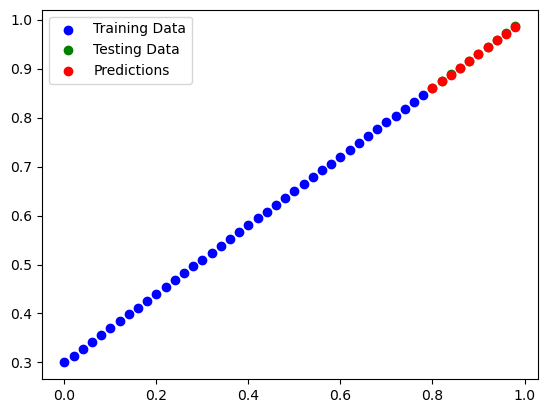

In [17]:
model.eval()

with torch.inference_mode():
    y_preds = model(X_test)

plot_predictions(X_train.cpu() , y_train.cpu() , X_test.cpu() , y_test.cpu() , y_preds.cpu())

In [18]:
torch.save(model , "model_LR_GPU.pth")

In [25]:
model_load = torch.load("model_LR_GPU.pth")
model_load.to(device)

next(model_load.parameters()).device

device(type='cuda', index=0)

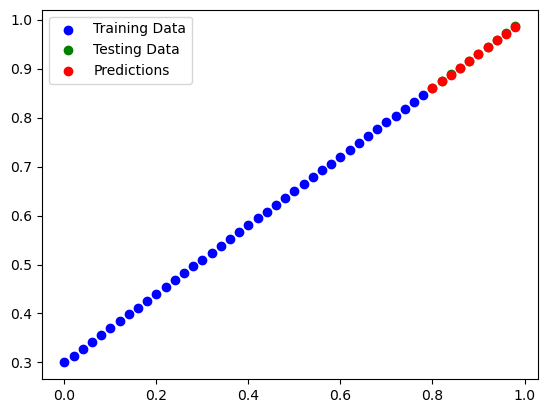

In [26]:
model_load.eval()

with torch.inference_mode():
    y_preds = model_load(X_test)

plot_predictions(X_train.cpu() , y_train.cpu() , X_test.cpu() , y_test.cpu() , y_preds.cpu())